In [16]:
import os
import librosa # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore
from IPython.display import Audio # type: ignore
import pickle
from scipy.signal import butter, lfilter # type: ignore
import noisereduce as nr # type: ignore

In [17]:
# Sample rate and desired cutoff frequencies (in Hz).
order = 4
lowcut = 200.0
highcut = 1200.0

In [18]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [19]:
# Load and preprocess audio data using spectrograms
labels = ['Drone','No_Drone']

######## Encoding targets and data-splitting #######
print("#: Encoding targets and data-splitting")
print("labels:")
print(labels)

# Encode target labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

#: Encoding targets and data-splitting
labels:
['Drone', 'No_Drone']


In [20]:
# save the iris classification model as a pickle file
model_pkl_file = "./model/2024-09-18 02:58:25.788779.pkl"

with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

File Audio Test: ./dataset/test/5m-50m-ex6.wav


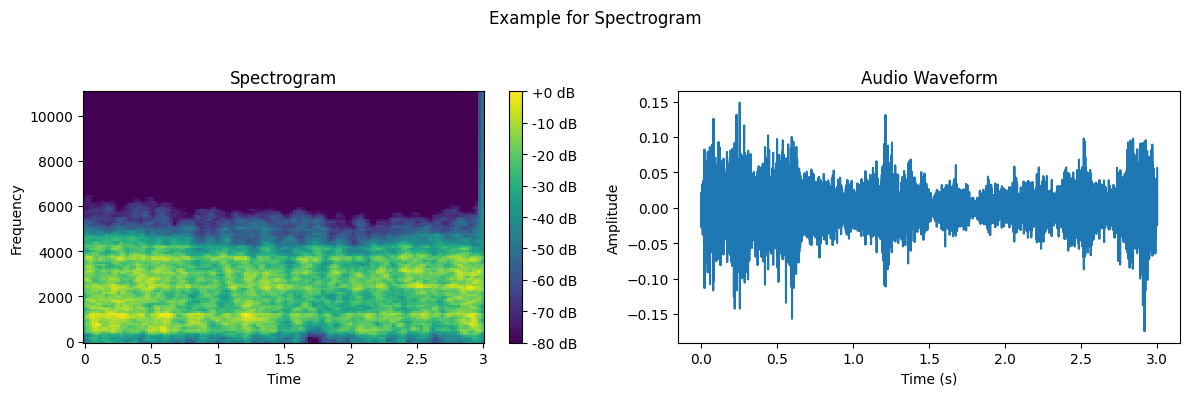

In [21]:
########### Audio Test ###########
audio_path = "./dataset/test/5m-50m-ex6.wav"
#audio_path = "/Users/panya/Project-ALL/DroneClassification/AcousticDroneDetection/dataset/test/Natural_3-14-ex61.wav"
print("File Audio Test: " + audio_path)
audio_test, sample_rate = librosa.load(audio_path, duration=3)  # Load audio and limit to 3 seconds

# normalize audio  
max_value = np.max(np.abs(audio_test))       # Determine the maximum values
audio_normalize = audio_test/max_value        # Use max_value and normalize sound data to get values between -1 & +1

# band pass filter 
audio_BPF = butter_bandpass_filter(audio_normalize,lowcut,highcut,sample_rate,order=7)

# Noise reduce
Audio_Reduced_Noise = nr.reduce_noise(y=audio_BPF, sr=sample_rate,prop_decrease = 1)

# convert to spectrogram 
spectrogram = librosa.feature.melspectrogram(y=Audio_Reduced_Noise, sr=sample_rate)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

# Plot Spectrogram
plt.figure(figsize=(12, 4))
plt.suptitle(f'Example for Spectrogram')
plt.subplot(1, 2, 1)
plt.title(f'Spectrogram')
librosa.display.specshow(spectrogram, x_axis='time', y_axis='hz',cmap='viridis')  #cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title(f'Audio Waveform')
plt.plot(np.linspace(0, len(Audio_Reduced_Noise) / sample_rate, len(Audio_Reduced_Noise)), Audio_Reduced_Noise)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Audio(data=audio_test, rate=sample_rate)


In [22]:
# test model
Y_Test =  spectrogram.T.reshape(-1,1)
OutputPredic = model.predict(Y_Test.T)
print('Output Predic:')
print(label_encoder.inverse_transform(OutputPredic))

Output Predic:
['Drone']


In [23]:
spectrogram.shape

(128, 130)

In [24]:
type(audio_BPF)

numpy.ndarray